# Crop Recommendation System
Precision agriculture is in trend nowadays. Precision agriculture is a modern farming technique that uses the data of soil characteristics, soil types, crop yield data, weather conditions and suggests the farmers with the most optimal crop to grow in their farms for maximum yield and profit. This technique can reduce the crop failures and will help the farmers to take informed decision about their farming strategy.In order to mitigate the agrarian crisis in the current status quo, there is a need for better recommendation systems to alleviate the crisis by helping the farmers to make an informed decision before starting the cultivation of crops.
Rana Karmakar
01-04-2022 [LinkedIn](https://www.linkedin.com/in/rana-karmakar-0972641a6)

In [4]:
# Required Libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

## Dataset at a Glance

In [5]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Statistical View

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
df.shape

(2200, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [11]:
df["label"].nunique()

22

## Data Visualization

<Figure size 1008x648 with 0 Axes>

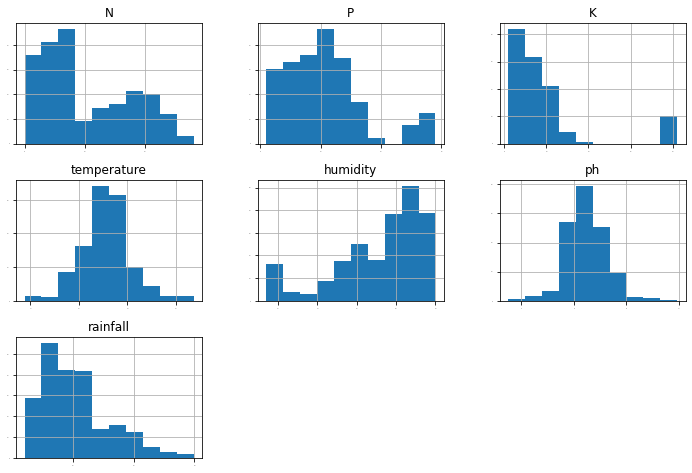

In [12]:
plt.figure(figsize=(14, 9))
df.hist(xlabelsize=1,ylabelsize=1,figsize=(12,8))
plt.show()

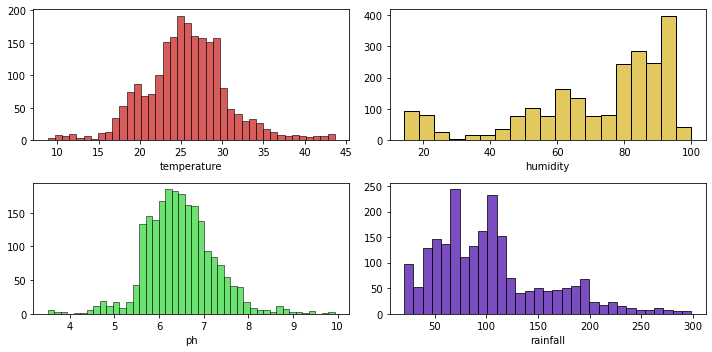

In [13]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) 
sns.histplot(df['temperature'], ax=axs2[0,0], color='#cc2525')
sns.histplot(df['humidity'], ax=axs2[0,1], color='#d9b629')
sns.histplot(df['ph'], ax=axs2[1,0], color='#3bd940')
sns.histplot(df['rainfall'], ax=axs2[1,1], color='#4d13ab')
axs2[0,0].set_xlabel('temperature')
axs2[0,1].set_xlabel('humidity')
axs2[1,0].set_xlabel('ph')
axs2[1,1].set_xlabel('rainfall')
axs2[0,0].set_ylabel('')
axs2[0,1].set_ylabel('')
axs2[1,0].set_ylabel('')
axs2[1,1].set_ylabel('')
fig2.tight_layout()
plt.show()

<AxesSubplot:xlabel='N', ylabel='Count'>

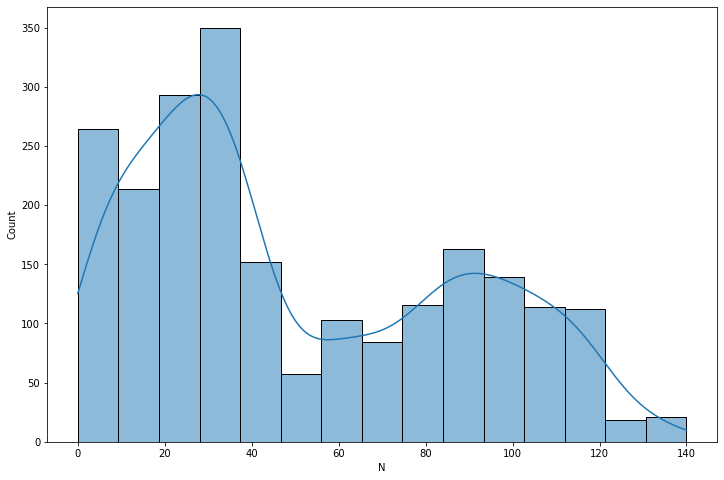

In [14]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.N, kde=True)

<AxesSubplot:xlabel='P', ylabel='Count'>

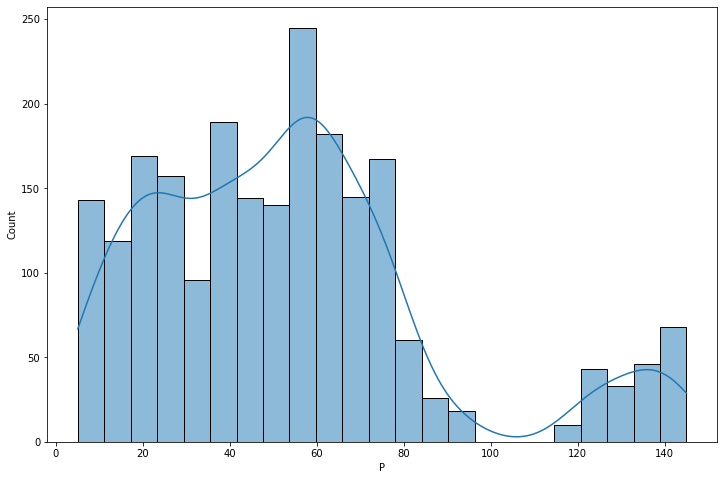

In [15]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.P, kde=True)

<AxesSubplot:xlabel='K', ylabel='Count'>

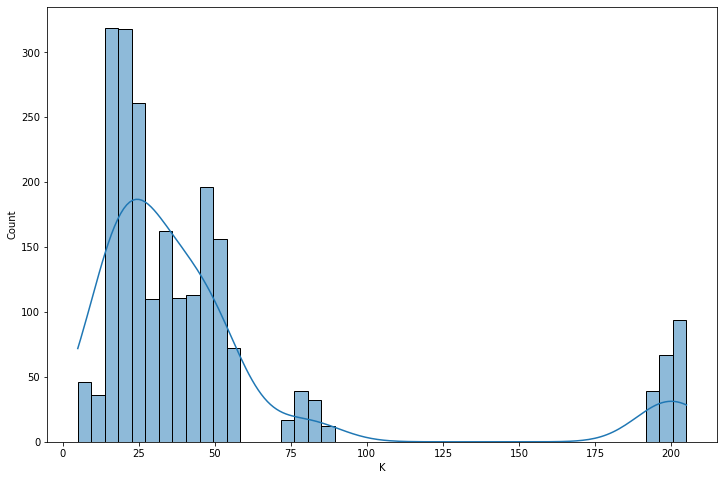

In [16]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.K, kde=True)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

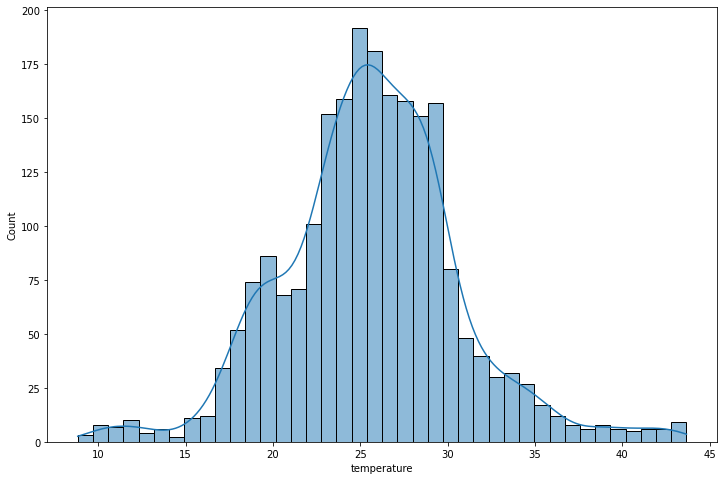

In [17]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.temperature, kde=True)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

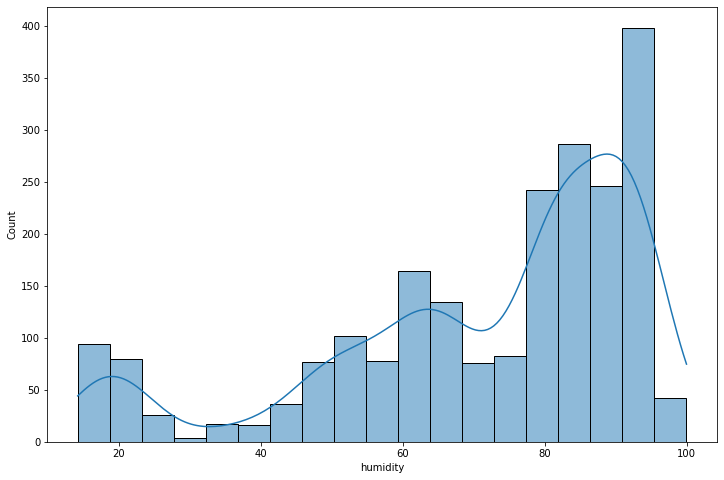

In [18]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.humidity, kde=True)

<AxesSubplot:xlabel='ph', ylabel='Count'>

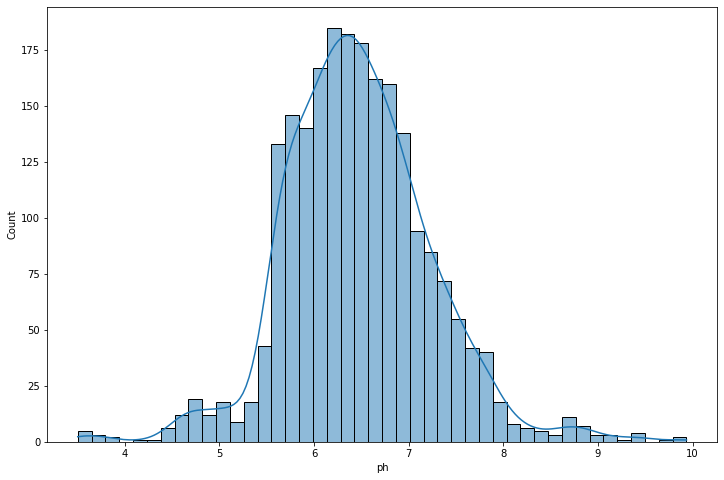

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df.ph, kde=True)

<Figure size 864x576 with 0 Axes>

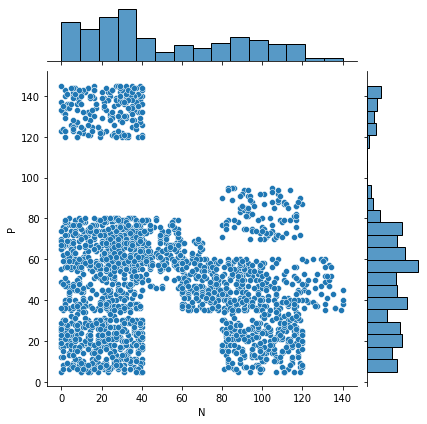

In [20]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.N, y = df.P, data = df)
plt.show()

<Figure size 864x576 with 0 Axes>

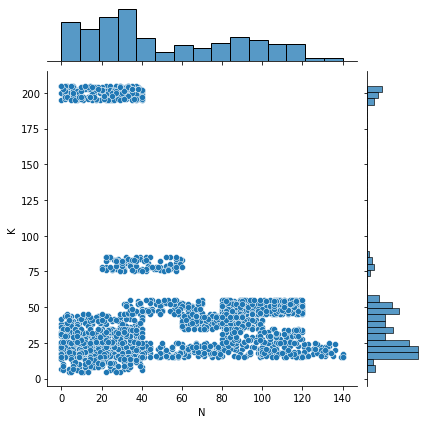

In [21]:
plt.figure(figsize=(12, 8))
sns.jointplot(x = df.N, y = df.K, data = df)
plt.show()

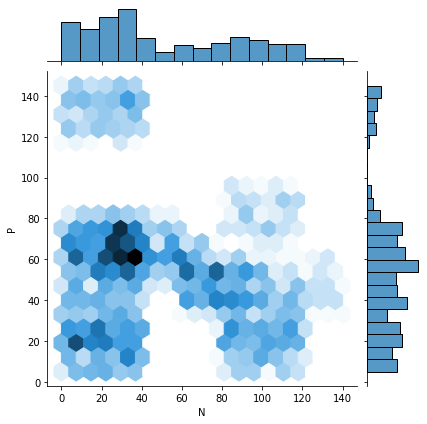

In [22]:
sns.jointplot(x = df.N, y = df.P, data = df, kind = 'hex')
plt.show()

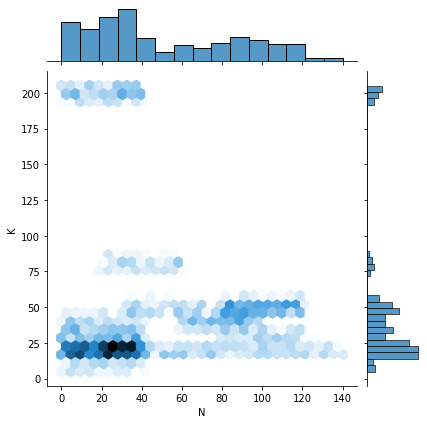

In [23]:
sns.jointplot(x = df.N, y = df.K, data = df, kind = 'hex')
plt.show()

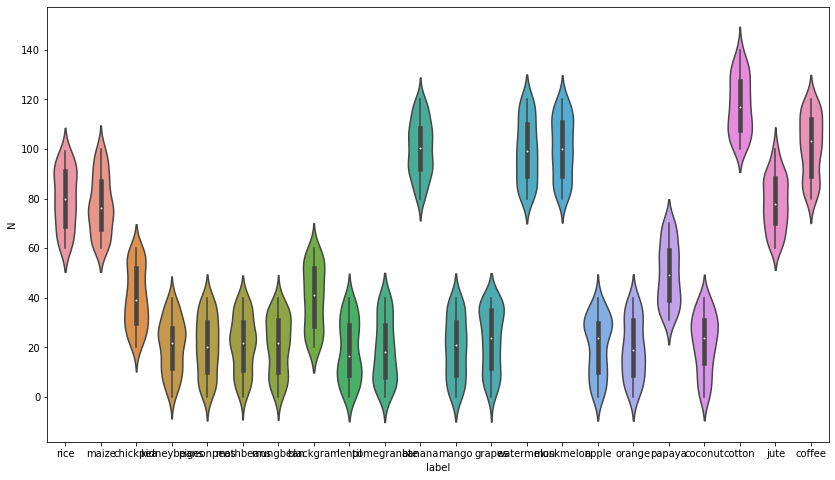

In [24]:
plt.figure(figsize=(14, 8))
sns.violinplot(x = "label", y = "N", data = df)
plt.show()

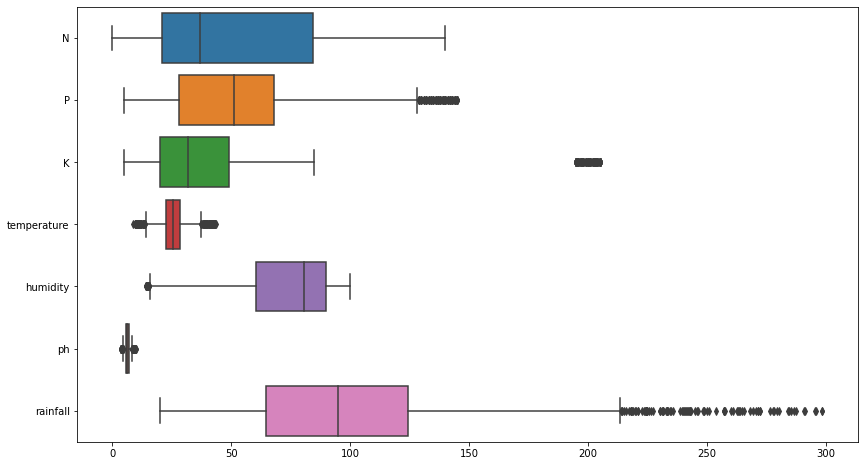

In [25]:
plt.figure(figsize=(14, 8))
sns.boxplot(data = df, orient = "h")
plt.show()

### Confusion Mtrix

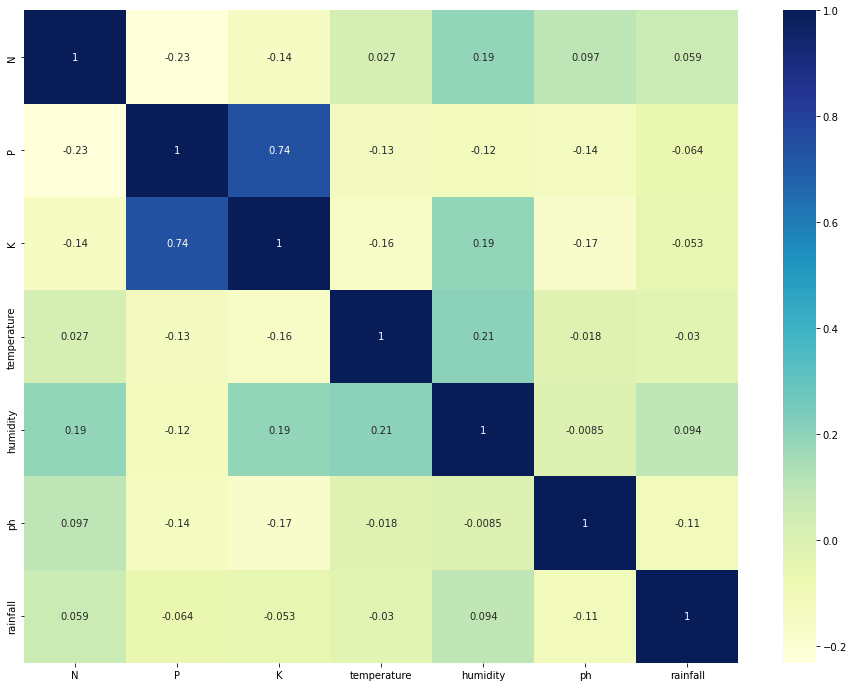

In [26]:
plt.figure(figsize=(16,12))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Data Processing

In [27]:
# label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# print(df["label"].value_counts())
df['label2']= label_encoder.fit_transform(df['label'])
print(df.head(10))

    N   P   K  temperature   humidity        ph    rainfall label  label2
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice      20
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice      20
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice      20
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice      20
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice      20
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice      20
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice      20
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice      20
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice      20
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice      20


In [28]:
maps = df[["label","label2"]].value_counts()
df.drop(columns='label', inplace=True)
maps

label        label2
apple        0         100
banana       1         100
rice         20        100
pomegranate  19        100
pigeonpeas   18        100
papaya       17        100
orange       16        100
muskmelon    15        100
mungbean     14        100
mothbeans    13        100
mango        12        100
maize        11        100
lentil       10        100
kidneybeans  9         100
jute         8         100
grapes       7         100
cotton       6         100
coffee       5         100
coconut      4         100
chickpea     3         100
blackgram    2         100
watermelon   21        100
dtype: int64

In [29]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label2
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


## Split dataset

In [30]:
x = df.drop(columns=['label2'])
y = df['label2']

## Feature Importance

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
 
rf.fit(x,y)
rf.feature_importances_

array([0.09890284, 0.14979514, 0.18109347, 0.0779139 , 0.21254165,
       0.05509981, 0.2246532 ])

Text(0.5, 0, 'Random Forest Feature Importance')

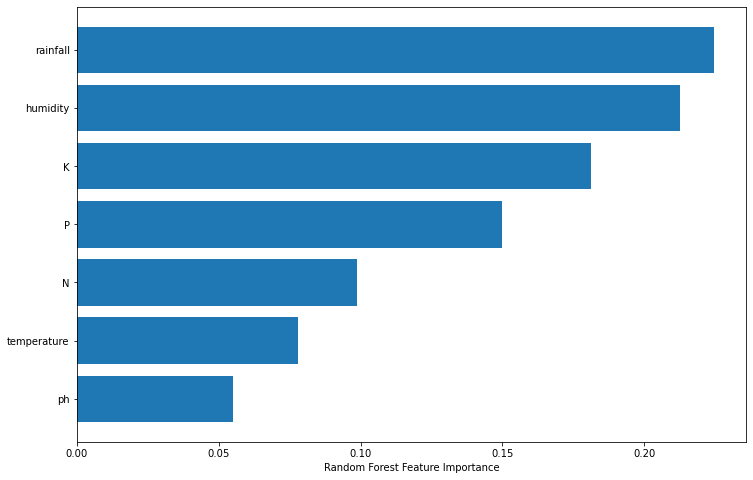

In [32]:
plt.figure(figsize=(12, 8))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Data Normalization

In [33]:
x.std()

N              36.917334
P              32.985883
K              50.647931
temperature     5.063749
humidity       22.263812
ph              0.773938
rainfall       54.958389
dtype: float64

In [34]:
#Applying StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_std = scaler.transform(x)
print(x_std.std())

1.0


## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

In [36]:
print("X_train Shape -", x_train.shape)
print("X_test Shape -", x_test.shape)
print("Y_train Shape -", y_train.shape)
print("Y_test Shape -", y_test.shape)

X_train Shape - (1540, 7)
X_test Shape - (660, 7)
Y_train Shape - (1540,)
Y_test Shape - (660,)


# ANN Model

In [37]:
from keras import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()

In [48]:
model.add(Dense(10, input_dim=7, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(28, activation='relu'))
model.add(Dense(26, activation='relu'))
model.add(Dense(22, activation='softmax'))

In [49]:
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                80        
                                                                 
 dense_9 (Dense)             (None, 15)                165       
                                                                 
 dense_10 (Dense)            (None, 20)                320       
                                                                 
 dense_11 (Dense)            (None, 25)                525       
                                                                 
 dense_12 (Dense)            (None, 30)                780       
                                                                 
 dense_13 (Dense)            (None, 28)                868       
                                                                 
 dense_14 (Dense)            (None, 26)               

In [51]:
# fit the keras model on the dataset
history = model.fit(x_train, y_train, validation_split=0.1, epochs=200, batch_size=32)

Epoch 1/200
44/44 [==============================] - 0s 4ms/step - loss: 3.0521 - accuracy: 0.1248 - val_loss: 2.9667 - val_accuracy: 0.1494
Epoch 2/200
44/44 [==============================] - 0s 2ms/step - loss: 2.7513 - accuracy: 0.1544 - val_loss: 2.3734 - val_accuracy: 0.2597
Epoch 3/200
44/44 [==============================] - 0s 1ms/step - loss: 2.0996 - accuracy: 0.2864 - val_loss: 1.6501 - val_accuracy: 0.4545
Epoch 4/200
44/44 [==============================] - 0s 1ms/step - loss: 1.5223 - accuracy: 0.4553 - val_loss: 1.3038 - val_accuracy: 0.4805
Epoch 5/200
44/44 [==============================] - 0s 1ms/step - loss: 1.2011 - accuracy: 0.5584 - val_loss: 1.0645 - val_accuracy: 0.5714
Epoch 6/200
44/44 [==============================] - 0s 2ms/step - loss: 1.0400 - accuracy: 0.6133 - val_loss: 0.9660 - val_accuracy: 0.6429
Epoch 7/200
44/44 [==============================] - 0s 1ms/step - loss: 0.9429 - accuracy: 0.6479 - val_loss: 0.8697 - val_accuracy: 0.6429
Epoch 8/200
4

Epoch 59/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0853 - accuracy: 0.9646 - val_loss: 0.1312 - val_accuracy: 0.9351
Epoch 60/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9719 - val_loss: 0.0975 - val_accuracy: 0.9481
Epoch 61/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0719 - accuracy: 0.9740 - val_loss: 0.1021 - val_accuracy: 0.9740
Epoch 62/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0677 - accuracy: 0.9747 - val_loss: 0.1456 - val_accuracy: 0.9545
Epoch 63/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0872 - accuracy: 0.9668 - val_loss: 0.1393 - val_accuracy: 0.9481
Epoch 64/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0994 - accuracy: 0.9668 - val_loss: 0.1365 - val_accuracy: 0.9416
Epoch 65/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9740 - val_loss: 0.1142 - val_accuracy: 0.9740
Epoch 

44/44 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9776 - val_loss: 0.0777 - val_accuracy: 0.9675
Epoch 117/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 0.9675 - val_loss: 0.1271 - val_accuracy: 0.9610
Epoch 118/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0321 - accuracy: 0.9885 - val_loss: 0.1029 - val_accuracy: 0.9610
Epoch 119/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 0.9899 - val_loss: 0.1079 - val_accuracy: 0.9610
Epoch 120/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9877 - val_loss: 0.0854 - val_accuracy: 0.9675
Epoch 121/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0356 - accuracy: 0.9827 - val_loss: 0.0740 - val_accuracy: 0.9545
Epoch 122/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9675 - val_loss: 0.2294 - val_accuracy: 0.9221
Epoch 123/200

44/44 [==============================] - 0s 1ms/step - loss: 0.0376 - accuracy: 0.9863 - val_loss: 0.0741 - val_accuracy: 0.9675
Epoch 174/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0156 - accuracy: 0.9949 - val_loss: 0.1266 - val_accuracy: 0.9740
Epoch 175/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0188 - accuracy: 0.9928 - val_loss: 0.0660 - val_accuracy: 0.9805
Epoch 176/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.1025 - val_accuracy: 0.9740
Epoch 177/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 0.9942 - val_loss: 0.1168 - val_accuracy: 0.9675
Epoch 178/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9942 - val_loss: 0.0760 - val_accuracy: 0.9740
Epoch 179/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0215 - accuracy: 0.9921 - val_loss: 0.1360 - val_accuracy: 0.9675
Epoch 180/200

# Model Evaluation

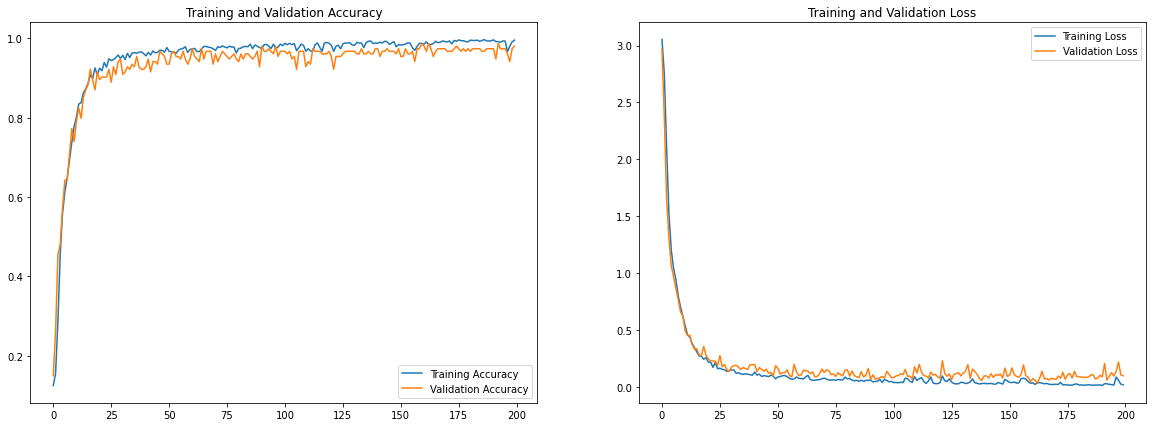

<Figure size 432x288 with 0 Axes>

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(200)

plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
plt.savefig("Accuracy.png")

In [45]:
scores = model.evaluate(x_test, y_test)

21/21 [==============================] - 0s 852us/step - loss: 0.0725 - accuracy: 0.9818


In [53]:
y_predict = model.predict(x_test)
y_predict[:2]

array([[4.7323927e-24, 8.0776082e-30, 3.0894467e-12, 5.6984469e-27,
        1.5731548e-07, 8.1448857e-09, 5.8119506e-26, 2.8373720e-20,
        1.3475453e-05, 2.7838588e-22, 4.3416936e-24, 9.6185060e-11,
        2.6126443e-08, 2.0155697e-13, 4.8991525e-21, 8.1328744e-34,
        1.5173509e-06, 3.8596500e-18, 3.7294021e-07, 9.9998450e-01,
        4.3652933e-16, 1.0588014e-35],
       [5.8940141e-24, 0.0000000e+00, 1.6451924e-29, 1.1732839e-14,
        4.8390606e-25, 0.0000000e+00, 0.0000000e+00, 4.6165823e-18,
        0.0000000e+00, 9.8858041e-01, 2.9130476e-29, 0.0000000e+00,
        1.7889568e-09, 8.1804072e-05, 0.0000000e+00, 0.0000000e+00,
        7.2732409e-34, 0.0000000e+00, 1.1337795e-02, 9.1869928e-24,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [54]:
model.save('crop_ann_model_.h5')

In [55]:
model = keras.models.load_model('crop_ann_model_.h5')

In [56]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                80        
                                                                 
 dense_9 (Dense)             (None, 15)                165       
                                                                 
 dense_10 (Dense)            (None, 20)                320       
                                                                 
 dense_11 (Dense)            (None, 25)                525       
                                                                 
 dense_12 (Dense)            (None, 30)                780       
                                                                 
 dense_13 (Dense)            (None, 28)                868       
                                                                 
 dense_14 (Dense)            (None, 26)               

In [57]:
model.predict(x_test[:1])

array([[4.7323568e-24, 8.0776699e-30, 3.0894408e-12, 5.6984038e-27,
        1.5731473e-07, 8.1448697e-09, 5.8119728e-26, 2.8373610e-20,
        1.3475427e-05, 2.7838376e-22, 4.3416936e-24, 9.6185060e-11,
        2.6126344e-08, 2.0155619e-13, 4.8991339e-21, 8.1328744e-34,
        1.5173496e-06, 3.8596206e-18, 3.7293916e-07, 9.9998450e-01,
        4.3652936e-16, 1.0588176e-35]], dtype=float32)

In [58]:
class_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

# Result

In [59]:
result = "------ Recommended Crop is {} with a {:.2f}% Confidance. ".format(class_names[np.argmax(y_predict[1:2])],
                                         100 * np.max(y_predict[1:2]))
print(result)

------ Recommended Crop is pomegranate with a 98.86% Confidance. 


# Traditional Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix

In [ ]:
# Algos to be Used
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')))

In [ ]:
# We see here that XGBClassifier is giving best Accuracy
results = []
names = []
for name, model in models:
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    result = confusion_matrix(y_test, prediction)
    print("                                                                                                            ")
    print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
    print("Algorithnm :",model)
    print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
    print("Confusion Matrix:")
    #print(result)
    plt.figure(figsize=(12, 7))
    sns.heatmap(result, annot=True)
    plt.show()
    result1 = classification_report(y_test, prediction)
    print("Classification Report:",)
    print (result1)
    result2 = accuracy_score(y_test,prediction)
    print ('R Squared =',r2_score(y_test, prediction))
    print("Accuracy:  ",result2*100,"%")

# XGBClassifier 

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)
prediction=model.predict(x_test)
result = confusion_matrix(y_test, prediction)
print("                                                                                                            ")
print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
print("Algorithnm :",model)
print("````````````````````````````````````````````````````````````````````````````````````````````````````````````")
print("Confusion Matrix:")
#print(result)
plt.figure(figsize=(14, 9))
sns.heatmap(result, annot=True)
plt.show()
result1 = classification_report(y_test, prediction)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,prediction)
print ('R Squared =',r2_score(y_test, prediction))
print("Accuracy:  ",result2*100,"%")

## Model Save and Import

In [ ]:
import pickle
pickle.dump(model, open('XGB_model.pkl', 'wb'))
#load saved model
model = pickle.load(open('XGB_model.pkl', 'rb'))
model.predict(x_test[:1])
class_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

## Result

In [ ]:
result = "------ Recommended Crop is {} with a {:.2f}% Confidance. ".format(class_names[np.argmax(y_predict[1:2])],
                                         100 * np.max(y_predict[1:2]))
print(result)